# Problem Set 1, due April 8th at 12:00pm 
(in other words, it is due at noon, or one minute after 11:59am).

### Before You Start
For this problem set, you should download INF0371-PS1.ipynb from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [13]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

IPython version:       3.1.0 (need at least 1.0)
Numpy version:         1.9.2 (need at least 1.7.1)
SciPy version:        0.15.1 (need at least 0.12.0)
Pandas version:       0.15.2 (need at least 0.11.0)
Maplotlib version:     1.4.3 (need at least 1.2.1)
Scikit-Learn version: 0.15.2 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- Nishant for the first 1/3 of assignnment

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [207]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [208]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape

# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506L, 13L)
(506L,)


In [209]:
boston = pd.DataFrame(bdata.data)

In [210]:
boston.columns = bdata.feature_names[:]
print boston.shape

(506, 13)


In [211]:
#adds MEDV to DataFrame
newdf = pd.DataFrame(bdata.target)
boston = pd.concat([boston, newdf], axis=1)
boston.columns.values[13] = 'MEDV'
boston.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [212]:
#1.1.1 different variables 
print('1.1.1')
print(len(boston.columns))

#1.1.1 different observations
print(len(boston))

#1.1.2 How many instances are classified as neighborhoods where the tract bounds the Charles River?
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
print('1.1.2')
print(len(boston[boston.CHAS == 1]))

#1.1.3 show that dataset does not contain any missing values
print('1.1.3')
boston2 = boston.dropna()
print(len(boston2) == len(boston))

#1.1.4 Display the property tax rate in the 5 neighborhoods that have the highest median housing price.
print('1.1.4')
hmed = boston.sort_values(['MEDV'], ascending=False)
hmed.head(5)

1.1.1
14
506
1.1.2
35
1.1.3
True
1.1.4


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
283,0.01501,90,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50
225,0.52693,0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50
369,5.66998,0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50
370,6.53876,0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50
371,9.23230,0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50


*Provide our answers below:*

 - 1.1.1: 14
 - 1.1.2: 506
 - 1.1.3: refer to answer above
 - 1.1.4: 198, 307, 666, 666, 666
          

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [213]:
#1.2.1
print('1.2.1')
hmed = boston.sort_values(['MEDV'], ascending=False)
print(hmed.head(1))

#1.2.2
print('1.2.2')
print(len(boston[boston.RM > 5]))

#1.2.3
print('1.2.3')
charles = boston[boston.CHAS == 1]
topcharles = charles.sort_values(['MEDV'], ascending=False)
print(topcharles.head(1))

#1.2.4
print('1.2.4')
print('crime rate in the neighborhood with the highest median housing price')
print(hmed.head(1).CRIM)

#1.2.5
print('1.2.5')
lmed = boston.sort_values(['MEDV'], ascending=True)
print('crime rate in the neighborhood with the lowest median housing price')
print(lmed.head(1).CRIM)

1.2.1
        CRIM  ZN  INDUS  CHAS    NOX     RM   AGE    DIS  RAD  TAX  PTRATIO  \
283  0.01501  90   1.21     1  0.401  7.923  24.8  5.885    1  198     13.6   

          B  LSTAT  MEDV  
283  395.52   3.16    50  
1.2.2
490
1.2.3
        CRIM  ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
372  8.26725   0   18.1     1  0.668  5.875  89.6  1.1296   24  666     20.2   

          B  LSTAT  MEDV  
372  347.88   8.88    50  
1.2.4
crime rate in the neighborhood with the highest median housing price
283    0.01501
Name: CRIM, dtype: float64
1.2.5
crime rate in the neighborhood with the lowest median housing price
398    38.3518
Name: CRIM, dtype: float64


*Provide our answers below:*

 - 1.2.1: 50
 - 1.2.2: 490
 - 1.2.3: 666
 - 1.2.4: 0.01501
 - 1.2.5: 38.3518

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [214]:
summary_df_ordered = pd.DataFrame(columns = ['variable', 'observations', 'mean', 'std dev', 'min', 'median', 'max'])

rows = boston.columns.values

count = 0
for item in rows:
    summary_df_ordered.loc[count] = [item, len(boston[item].dropna()),boston[item].mean(),boston[item].std(),
                                     boston[item].min(),boston[item].median(),boston[item].max()]
    count = count + 1

summary_df_ordered

,variable,observations,mean,std dev,min,median,max
0,CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
1,ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [215]:
from scipy import stats

stats.ttest_ind(boston[boston.CHAS == 1].MEDV, boston[boston.CHAS == 0].MEDV, equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.0035671700981375169)

Since the P value is .003, it is safe to say that we can reject the null hypothesis (on an 'a' value of .05)

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


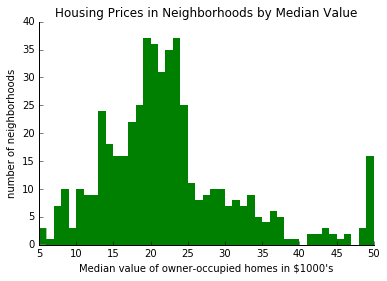

In [216]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  
import matplotlib.spines as spines

#creates histogram. bins=45 because graph starts at 5 and ends at 50 
histo = plt.hist(bdata.target, bins=45, color='green', edgecolor='none')

#chart labels
plt.title('Housing Prices in Neighborhoods by Median Value')
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('number of neighborhoods')

#getting rid of spines and ticks
#help from divenex http://stackoverflow.com/questions/925024/how-can-i-remove-the-top-and-right-axis-in-matplotlib
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.show()

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


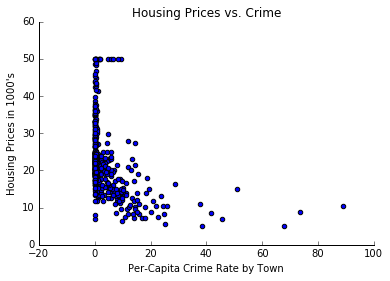

In [217]:
#creates scatterplot with labels
plt.scatter(boston.CRIM, boston.MEDV)
plt.title('Housing Prices vs. Crime')
plt.ylabel('Housing Prices in 1000\'s')
plt.xlabel('Per-Capita Crime Rate by Town')

#getting rid of spines and ticks
#help from divenex http://stackoverflow.com/questions/925024/how-can-i-remove-the-top-and-right-axis-in-matplotlib
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [218]:
#calculating correlation between crime and house prices
np.corrcoef(boston.CRIM, boston.MEDV)

array([[ 1.        , -0.38583169],
       [-0.38583169,  1.        ]])

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

The scatterplot is very condensed between 0-20% crime rate generally for house prices over 10,000 dollars. There does seem to be a correlation between housing prices and crime where neighborhoods with higher prices tend to have a lower percent of crime and crime being higher in lower costing neighborhoods. The correlation between MED and CRIM are -.39 (rounded two places). Since the correlation coefficient is not that high of a number compared to the correlation of different variables like in 2.4, I would like to say that there is a small correlation between Crime and Median Home Value.

*Write your thoughts here (1-2 paragraphs).*

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear green (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

In [219]:
cols = boston.columns.values
print(cols)
pairs = []

#creates list of variable pairs
for item1 in cols:
    for item2 in cols:
        add = True
        for arr in pairs:
            if(item1 in arr and item2 in arr):
                add = False
        if(item1 == item2):
            add = False
        if(add):
            pairs.append([item1, item2])    

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


In [220]:
corr_df = pd.DataFrame(columns = cols)

#creating rows
for item in cols:
    corr_df.loc[item] = 1
    
#creates i by j matrix in dataframe 
for pair in pairs:
    corr_arr = np.corrcoef(boston[pair[0]], boston[pair[1]])
    val = corr_arr[0][1]
    corr_df.loc[pair[0]][pair[1]] = val
    corr_df.loc[pair[1]][pair[0]] = val
    
corr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


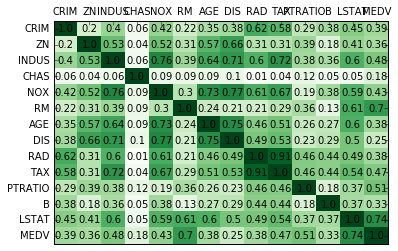

In [221]:
fig, ax = plt.subplots()

#df turned positive
pos_df = corr_df

#makes negative numbers positive
for col in cols:
    for row in cols:
        if(pos_df[col][row] < 0):
            pos_df.loc[col][row] = pos_df.loc[col][row] * -1
            pos_df.loc[row][col] = pos_df.loc[row][col] * -1
            
heatmap = ax.pcolor(pos_df, cmap=plt.cm.Greens)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(corr_df.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(corr_df.shape[1])+0.5, minor=False)

# adding line ticks and making y axis
ax.invert_yaxis()
ax.xaxis.tick_top()

#setting ticks on axis for more visibility
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

#adds numbers to cells (rounded to 2 places)
count1 = 0
count2 = 0
for col in cols:
    for row in cols:
        ax.text(count2 + .5,count1 + .5, round(corr_df[col][row],2),horizontalalignment='center', verticalalignment='center',)
        count1 = count1 + 1
    count1 = 0
    count2 = count2 + 1
plt.show()

TAX and RAD

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

(0, 52)

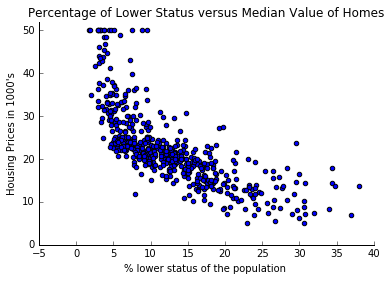

In [222]:
#creates scatterplot with labels
plt.scatter(boston.LSTAT, boston.MEDV)
plt.title('Percentage of Lower Status versus Median Value of Homes')
plt.ylabel('Housing Prices in 1000\'s')
plt.xlabel('% lower status of the population ')

#getting rid of spines and ticks
#help from divenex http://stackoverflow.com/questions/925024/how-can-i-remove-the-top-and-right-axis-in-matplotlib
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim([0,52])